Options data for SCCO:
Average IV for Calls: 0.06596877203813602
Average IV for Puts: 0.27873268277307106
Total Call Volume: 849.0
Total Call open interest: 14318
Total Call engagement: 15167.0
Total Put Volume: 1600.0
Total Put open interest: 11911
Total Put engagement: 13511.0
Number of ITM Call Options: 98
Number of ITM Put Options: 29


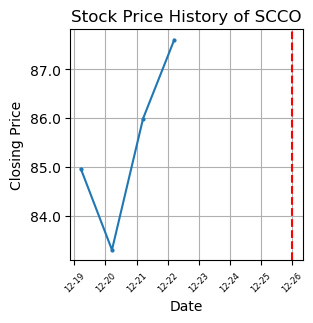

Options data for CALM:
Average IV for Calls: 0.04732943912324451
Average IV for Puts: 0.17894394320326584
Total Call Volume: 618.0
Total Call open interest: 12940
Total Call engagement: 13558.0
Total Put Volume: 618.0
Total Put open interest: 5095
Total Put engagement: 5713.0
Number of ITM Call Options: 37
Number of ITM Put Options: 7


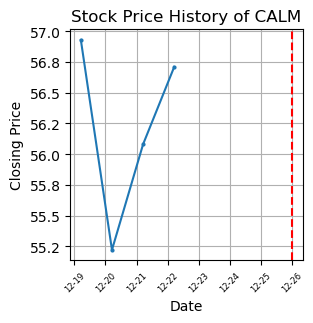

Options data for BANX:
Average IV for Calls: 0.18970536865234375
Average IV for Puts: nan
Total Call Volume: 11.0
Total Call open interest: 36
Total Call engagement: 47.0
Total Put Volume: 54.0
Total Put open interest: 92.0
Total Put engagement: 146.0
Number of ITM Call Options: 2
Number of ITM Put Options: 1


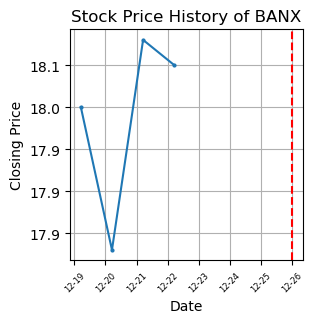

Options data for BYFC:
Average IV for Calls: 1.0000000000000003e-05
Average IV for Puts: nan
Total Call Volume: 55.0
Total Call open interest: 190
Total Call engagement: 245.0
Total Put Volume: 0.0
Total Put open interest: 1.0
Total Put engagement: 1.0
Number of ITM Call Options: 3
Number of ITM Put Options: 0


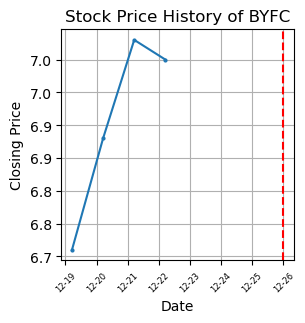

Options data for LFCR:
Average IV for Calls: 0.2633702150878906
Average IV for Puts: 0.0814825892857143
Total Call Volume: 300.0
Total Call open interest: 2273
Total Call engagement: 2573.0
Total Put Volume: 68.0
Total Put open interest: 910
Total Put engagement: 978.0
Number of ITM Call Options: 6
Number of ITM Put Options: 11


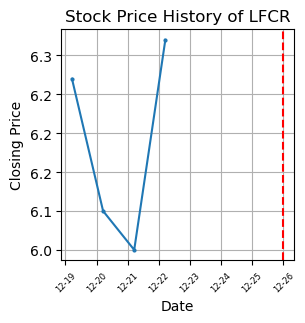

Options data for MDVL:
Average IV for Calls: 1.0000000000000003e-05
Average IV for Puts: nan
Total Call Volume: 2
Total Call open interest: 0
Total Call engagement: 2
Total Put Volume: 0.0
Total Put open interest: 0.0
Total Put engagement: 0.0
Number of ITM Call Options: 1
Number of ITM Put Options: 0


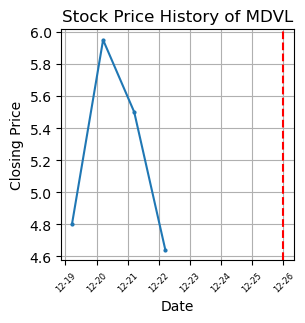

Options data for YELLQ:
Average IV for Calls: 0.668111604822776
Average IV for Puts: 2.314769321434384
Total Call Volume: 571.0
Total Call open interest: 14341
Total Call engagement: 14912.0
Total Put Volume: 488.0
Total Put open interest: 10370
Total Put engagement: 10858.0
Number of ITM Call Options: 24
Number of ITM Put Options: 4


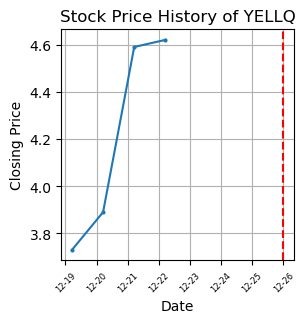

Options data for OMEX:
Average IV for Calls: 0.20625793750000002
Average IV for Puts: 0.2828853173828125
Total Call Volume: 228.0
Total Call open interest: 4677
Total Call engagement: 4905.0
Total Put Volume: 137.0
Total Put open interest: 1705
Total Put engagement: 1842.0
Number of ITM Call Options: 6
Number of ITM Put Options: 3


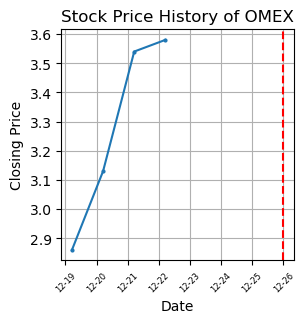

Options data for ENLV:
Average IV for Calls: 0.229174375
Average IV for Puts: nan
Total Call Volume: 751.0
Total Call open interest: 2432
Total Call engagement: 3183.0
Total Put Volume: 24.0
Total Put open interest: 4.0
Total Put engagement: 28.0
Number of ITM Call Options: 4
Number of ITM Put Options: 0


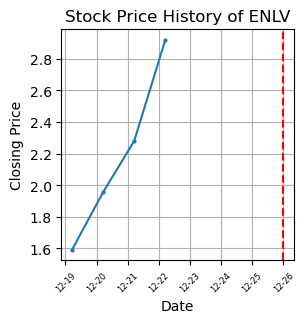

Options data for DZSI:
Average IV for Calls: 1.1265696582031253
Average IV for Puts: nan
Total Call Volume: 77.0
Total Call open interest: 781
Total Call engagement: 858.0
Total Put Volume: 30.0
Total Put open interest: 30.0
Total Put engagement: 60.0
Number of ITM Call Options: 0
Number of ITM Put Options: 4


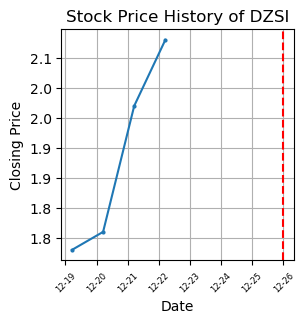

Options data for RDHL:
Average IV for Calls: 1.9821465066964288
Average IV for Puts: 3.2187542350260414
Total Call Volume: 12
Total Call open interest: 1203
Total Call engagement: 1215
Total Put Volume: 27.0
Total Put open interest: 75
Total Put engagement: 102.0
Number of ITM Call Options: 0
Number of ITM Put Options: 6


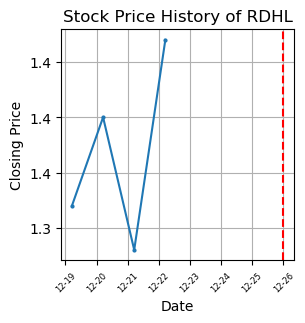

Options data for ARVL:
Average IV for Calls: 1.297817748828125
Average IV for Puts: 1.356034997535342
Total Call Volume: 1291.0
Total Call open interest: 31274
Total Call engagement: 32565.0
Total Put Volume: 1094.0
Total Put open interest: 10619
Total Put engagement: 11713.0
Number of ITM Call Options: 4
Number of ITM Put Options: 19


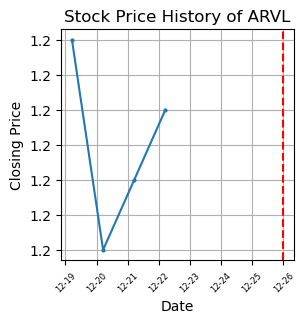

Options data for LILM:
Average IV for Calls: 0.8283488811079545
Average IV for Puts: 1.2221194747869322
Total Call Volume: 311.0
Total Call open interest: 43086
Total Call engagement: 43397.0
Total Put Volume: 481.0
Total Put open interest: 4510
Total Put engagement: 4991.0
Number of ITM Call Options: 5
Number of ITM Put Options: 16


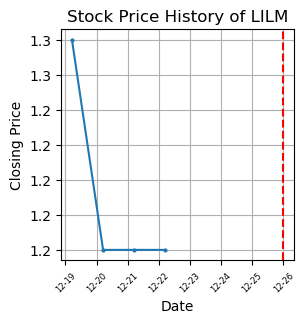

Options data for MESA:
Average IV for Calls: 0.9349010156249998
Average IV for Puts: nan
Total Call Volume: 8315
Total Call open interest: 13694
Total Call engagement: 22009
Total Put Volume: 5.0
Total Put open interest: 95.0
Total Put engagement: 100.0
Number of ITM Call Options: 0
Number of ITM Put Options: 5


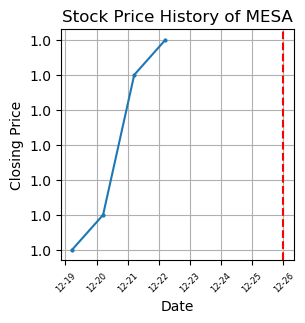

Options data for FUV:
Average IV for Calls: 2.060768195529514
Average IV for Puts: 1.3970669232536763
Total Call Volume: 971
Total Call open interest: 8319
Total Call engagement: 9290
Total Put Volume: 657.0
Total Put open interest: 1649
Total Put engagement: 2306.0
Number of ITM Call Options: 1
Number of ITM Put Options: 16


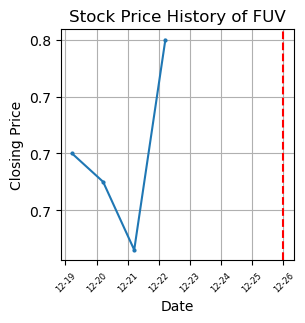

Options data for TLSA:
Average IV for Calls: 0.500005
Average IV for Puts: nan
Total Call Volume: 17.0
Total Call open interest: 573
Total Call engagement: 590.0
Total Put Volume: 0.0
Total Put open interest: 0.0
Total Put engagement: 0.0
Number of ITM Call Options: 0
Number of ITM Put Options: 2


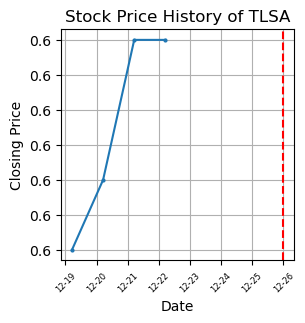

Options data for SRNEQ:
Average IV for Calls: 1.0892880245535714
Average IV for Puts: 3.333333333333334e-06
Total Call Volume: 105.0
Total Call open interest: 14462
Total Call engagement: 14567.0
Total Put Volume: 13.0
Total Put open interest: 722.0
Total Put engagement: 735.0
Number of ITM Call Options: 0
Number of ITM Put Options: 12


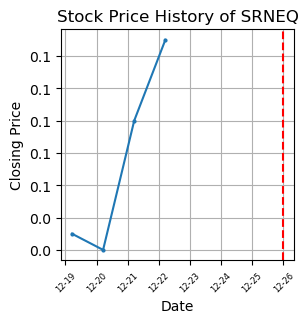

Options data for FXLV:
Average IV for Calls: 2.000001302083333
Average IV for Puts: nan
Total Call Volume: 8.0
Total Call open interest: 918
Total Call engagement: 926.0
Total Put Volume: 0.0
Total Put open interest: 0.0
Total Put engagement: 0.0
Number of ITM Call Options: 0
Number of ITM Put Options: 1


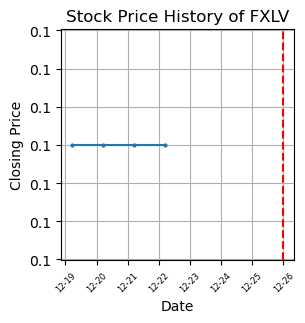

Options data for FRCB:
Average IV for Calls: 6.3722557106370195
Average IV for Puts: 2.2649572649572653e-06
Total Call Volume: 494
Total Call open interest: 62937
Total Call engagement: 63431
Total Put Volume: 103.0
Total Put open interest: 9713
Total Put engagement: 9816.0
Number of ITM Call Options: 0
Number of ITM Put Options: 40


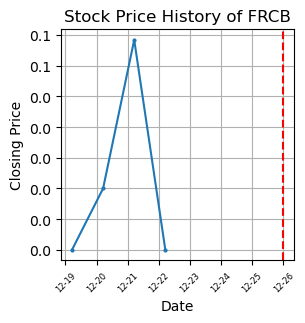

Options data for INFIQ:
Average IV for Calls: 0.08333416666666667
Average IV for Puts: 0.0
Total Call Volume: 1.0
Total Call open interest: 3286.0
Total Call engagement: 3287.0
Total Put Volume: 0.0
Total Put open interest: 0.0
Total Put engagement: 0.0
Number of ITM Call Options: 0
Number of ITM Put Options: 5


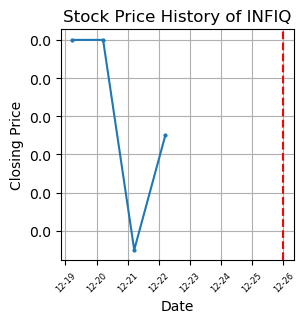

Options data for RVLPQ:
Average IV for Calls: 0.29166958333333337
Average IV for Puts: 0.0
Total Call Volume: 0.0
Total Call open interest: 372
Total Call engagement: 372.0
Total Put Volume: 0.0
Total Put open interest: 10.0
Total Put engagement: 10.0
Number of ITM Call Options: 0
Number of ITM Put Options: 2


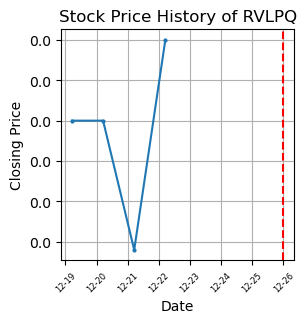

Options data for TTCFQ:
Average IV for Calls: 0.05588291176470589
Average IV for Puts: 2.3921568627450986e-06
Total Call Volume: 69.0
Total Call open interest: 37200
Total Call engagement: 37269.0
Total Put Volume: 35.0
Total Put open interest: 8218.0
Total Put engagement: 8253.0
Number of ITM Call Options: 0
Number of ITM Put Options: 29


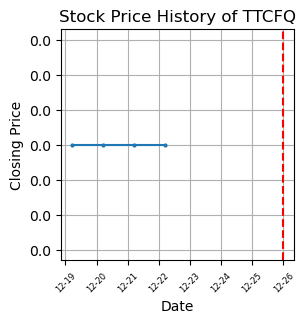

In [2]:
from datetime import datetime, timedelta
from utils import *  

# Call the function and store the result
day = '2023-12-26'

# First page
url = 'https://finance.yahoo.com/calendar/earnings/?day=' + day

ticker_data_list = process_earnings_table(extract_table(url))
    
# Second page
url += '&offset=100&size=100'

ticker_data_list = process_earnings_table(extract_table(url), ticker_data_list)

# Pandas Dataframe
ticker_data_sorted = convert_to_dataframe(ticker_data_list)

# Set the time frame
release_date = datetime.strptime(day, '%Y-%m-%d')
end_date = release_date + timedelta(days=4)
start_date = release_date - timedelta(days=7)

filtered_tickers = []

# Iterate through the sorted list of tickers
for index, row in ticker_data_sorted.iterrows():
    ticker = row['Symbol']
    
    if ticker in filtered_tickers:
        continue

    # Use the function from utils.py to analyze stock options
    options_metrics = analyze_stock_options(ticker)

    if options_metrics['total_itm_calls'] == 0 and options_metrics['total_itm_puts'] == 0:
        continue

    # Print 
    print_options_data(ticker, options_metrics)

    # Call the plot_stock_history method
    plot_stock_history(ticker, start_date, end_date, release_date=release_date)
    
    # Filtered tickers
    filtered_tickers.append(ticker)
